In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [ ]:
!unzip drive/MyDrive/Colab\ Notebooks/cat_vs_dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5499.jpg  
  inflating: PetImages/Dog/55.jpg    
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   

In [ ]:
transform = transforms.Compose([
transforms.Resize((64, 64)),
transforms.RandomHorizontalFlip(),
transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
data_dir = "PetImages/"

In [ ]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])


train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


classes = dataset.classes
print(f"Classes: {classes}")
print(f"Training samples: {len(train_data)}, Testing samples: {len(test_data)}")

Classes: ['Cat', 'Dog']
Training samples: 19998, Testing samples: 5000


In [ ]:
train_data[0][0].shape

torch.Size([3, 64, 64])

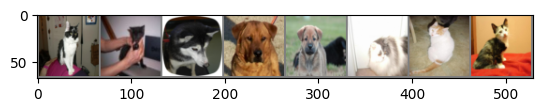

Cat   Cat   Dog   Dog   Dog   Cat   Cat   Cat  


In [ ]:
import torchvision


def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()


dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8]))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [ ]:
class EmotionCNN(nn.Module):
  def __init__(self, num_classes):
    super(EmotionCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
    self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(128 * 8 * 8, 256)
    self.fc2 = nn.Linear(256, num_classes)
    self.dropout = nn.Dropout(0.3)


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 128 * 8 * 8)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.fc2(x)
    return x

In [ ]:
model = EmotionCNN(num_classes=len(classes))
print(model)

EmotionCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 15
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()


  print(f"Epoch [{epoch+1}/{epochs}] Loss: {running_loss/len(train_loader):.4f}")

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Epoch [1/15] Loss: 0.5864
Epoch [2/15] Loss: 0.4701
Epoch [3/15] Loss: 0.4001
Epoch [4/15] Loss: 0.3526
Epoch [5/15] Loss: 0.3096
Epoch [6/15] Loss: 0.2846
Epoch [7/15] Loss: 0.2482
Epoch [8/15] Loss: 0.2263
Epoch [9/15] Loss: 0.2076
Epoch [10/15] Loss: 0.1800
Epoch [11/15] Loss: 0.1613
Epoch [12/15] Loss: 0.1337
Epoch [13/15] Loss: 0.1223
Epoch [14/15] Loss: 0.1076
Epoch [15/15] Loss: 0.0912


In [1]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Test Accuracy: {100 * correct / total:.2f}%')

NameError: name 'model' is not defined

In [ ]:
torch.save(model.state_dict(), 'catvsdogs_cnn.pth')
print('Model saved!')

In [ ]:
def predict_image(image_path):
  image = Image.open(image_path)
  image = transform(image).unsqueeze(0).to(device)
  model.eval()
  with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)
  return classes[predicted.item()]

print(predict_image('PetImages/Cat/10144.jpg'))
print(predict_image('PetImages/Dog/10000.jpg'))